In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This model will be evaluating the economic viability of a social enterprise cannabis community cafe

Questions to answer

How many visitors would it take to operate different sizes of community cafe?

How many extra visitors would you need to subsidise arts workshops?


These are the variables:

FIXED COSTS

Rent: The monthly rent that the company would have to pay
Business rate: The business rate that the company would have to pay per year
Utilities, insurance and maintainance: The costs of running the place

VARIABLE COSTS

Staff salaries: The monthly salary cost for staff
Inventory costs: Cannabis, Food, Drinks, Miscellanious
Marketing: If it's allowed
Arts Workshop

To work out the visitors needed for a cannabis cafe to break even I have found data from a few sources to help ground the model in reality. 


Shows that the cost to start up a cafe is around £100,000, I will add another £50,000 to make it £150,000 for start up

https://www.startuploans.co.uk/business-guidance/open-coffee-shop/Show


For rent prices I've built a dataset using the commercial rental listings from the website Estates Gazette Property Link.

Bristol Commercial Rental prices (Accessed 30/05/24)
https://propertylink.estatesgazette.com/licensed-and-leisure-for-rent/bristol?filters%5Bnot_property_states%5D%5B%5D=Under+Offer&filters%5Bproperty_types%5D%5B%5D=retail&filters%5Bproperty_types%5D%5B%5D=residential&filters%5Bproperty_types%5D%5B%5D=other_property_types&filters%5Bto_let_price%5D%5Bcurrency%5D=gbp&filters%5Bto_let_price%5D%5Bfrom%5D=&filters%5Bto_let_price%5D%5Bsize_modifier%5D=sqft&filters%5Bto_let_price%5D%5Bto%5D=&sort_direction=asc&sort_field=system_to_let_price.from&view=grid


For costs incurred for running a cannabis business, I have used data from Canada. Canada was the first country to legalise cannabis for recreational use in 2018. So using their established framework for costs for business seems like a suitable choice.

For cannabis wholesale prices including taxes. I have used the; Summary report: 2021-2022 Review of the cannabis cost recovery framework written on the Canadian governments website. The description of the report is as follows:

'This report summarizes the review that was carried out between August 2021 and March 2022. It represents a snapshot in time of an industry that is relatively new, and economic and market circumstances for licence holders at a point in time, which may have changed significantly between the completion of the review and the publication of this report.'

Canadian Government Report 2021-2022 (Accessed 30/05/24)
https://www.canada.ca/en/health-canada/services/drugs-medication/cannabis/industry-licensees-applicants/cost-recovery/2021-2022-summary-report.html

Wholeprice including tax: C$4 

For the licencing costs I have also used Canadian data. Specificially the British Columbia Government website for applying for cannabis retail store licence.

https://www2.gov.bc.ca/gov/content/employment-business/business/liquor-regulation-licensing/cannabis-licences/apply-cannabis-licence/apply-for-a-cannabis-retail-store-licence

First year fee and licence cost: C$3000
To convert all the Canandian costs into British Pounds, I have used the website XE. 

For Cannabis retail insurance costs, I have used a Canadian insurance companies blog post about the costs. They are likley to have experience in the sector, but mention that due to the sector being new the prices can vary. 

https://mitchinsurance.com/blog/what-insurance-cannabis-store-canada/

Yearly costs including taxes: C$6500 

XE Canandian Dollars to British Pounds (Accessed 31/05/24)
https://www.xe.com/en-gb/currencyconverter/convert/?Amount=7500&From=CAD&To=GBP

canadian_conversion = 0.575991


The Cannabis cafe would also be operating as a restaurant/cafe so I have found restaurant and cafe prices from a catering equipment supply company. They would have experience talking with many businesses so their costs are likely to be accurate but each business is different.

Catering Equipment Supplier (Accessed 30/05/24)
https://yesgroupuk.com/blog/ultimate-restaurant-costs-breakdown-guide/

For Staff costs I have made it £14 an hour which is £2.56 above the national minimum wage for 21 and over.

National Minimum Wage 2024
https://www.gov.uk/government/publications/the-national-minimum-wage-in-2024

For the average amount of cannabis consumed, I'm using this paper:

Conti, G., Pudney, S.E., Bryan, M.L., Badillo, C., Burton, J., & Iacovou, M. (2006). Estimating the size of the UK illicit drug market.

I will using the frequent user average consumption per day for my estimate which is 1.2g.

In [42]:
# Finding the average price per sq. ft per annum in Bristol

bristol_rental_csv = pd.read_csv('bristol_commercial_rents.csv')
bristol_rental_csv.head()

,Address,Rent (£ pa),Size (sq. ft)
0,"Berkeley Place, Clifton, Bristol, BS8 1EH",35000,4865
1,"41 High Street, Shirehampton, Bristol, City of...",15000,1968
2,"149A, Crow Lane, Henbury, Bristol, BS10 7DR",30000,3765
3,"42 Regent Street, Kingswood, South West, BS15",30000,2813
4,"13 Carlton Court, Canford Lane, Bristol, City ...",12500,1049


In [43]:
# Finding average cost

bristol_rental_csv['bristol_sqft_pa'] = bristol_rental_csv['Rent (£ pa)'] / bristol_rental_csv['Size (sq. ft)']
bristol_rental_csv.head()

,Address,Rent (£ pa),Size (sq. ft),bristol_sqft_pa
0,"Berkeley Place, Clifton, Bristol, BS8 1EH",35000,4865,7.194245
1,"41 High Street, Shirehampton, Bristol, City of...",15000,1968,7.621951
2,"149A, Crow Lane, Henbury, Bristol, BS10 7DR",30000,3765,7.968127
3,"42 Regent Street, Kingswood, South West, BS15",30000,2813,10.664771
4,"13 Carlton Court, Canford Lane, Bristol, City ...",12500,1049,11.916111


In [44]:
bristol_sqft_pa_mean = bristol_rental_csv['bristol_sqft_pa'].mean()
bristol_sqft_pa_mean = round(bristol_sqft_pa_mean, 2)
bristol_sqft_pa_mean

20.55

In [46]:
canadian_conversion = 0.575991

In [128]:
def fixed_costs(size, staff_size, days_open):
    rent = (int(size) * bristol_sqft_pa_mean) / 12  # Uses average rent per sqft to work out total rent per month
    staff_costs = int(staff_size) * (int(days_open) * 14) # Staff costs if the place opened for X number of days from 9am-11pm
    utilities = 1500
    licencing_cost = 3000 * canadian_conversion
    cannabis_insurance_cost = 6500 * canadian_conversion
    restaurant_insurance_cost = 1500
    startup_cost_monthly = 2500
    
    
    total_fixed_cost = rent + staff_costs + utilities + licencing_cost + cannabis_insurance_cost
    return total_fixed_cost



In [129]:
average_consumption = [0.6, 1.2, 1.8] # Average consumption in grams

sqft_staff_pairs = [[1000, 2], [1000, 3], [1000, 4], [1000, 5],
    [2000, 2], [2000, 3], [2000, 4], [2000, 5],
    [3000, 2], [3000, 3], [3000, 4], [3000, 5],
    [4000, 2], [4000, 3], [4000, 4], [4000, 5],
    [5000, 2], [5000, 3], [5000, 4], [5000, 5]]

df = pd.DataFrame(sqft_staff_pairs, columns=['Size_(sqft)', 'Staff_Size'])

In [130]:

# Function to calculate revenue and visitors needed
def calculate_revenue_and_visitors(row, consumption_grams):
    size = row['Size_(sqft)']
    staff_size = row['Staff_Size']
    days_open = 25  # Assuming 25 days open in a month
    
    total_fixed_cost = fixed_costs(size, staff_size, days_open)
    food_drink_cost = 5 / 1.35  # Food and drinks profit margin
    cannabis_cost = 4 * canadian_conversion

    revenue = 0
    visitors = 0
    cannabis_grams = 0
        
    while total_fixed_cost > revenue:
        simulated_spend = (10 * consumption_grams) + np.random.randint(0, 8)
        visitors += 1
        revenue += simulated_spend
        cannabis_grams += consumption_grams
        
    total_food_drink_cost = food_drink_cost * visitors
    total_cannabis_cost = cannabis_grams * cannabis_cost
    variable_costs = total_food_drink_cost + total_cannabis_cost
    total_monthly_revenue_needed = total_fixed_cost + variable_costs

    return pd.Series([total_monthly_revenue_needed, visitors])

In [131]:
# Copy of the original DataFrame
average_consumption_0_6 = df.copy()

# Apply the calculate_revenue_and_visitors function for the first consumption level
consumption_level = average_consumption[0]
average_consumption_0_6[['Revenue_Needed', 'Visitors_Needed']] = average_consumption_0_6.apply(lambda row: calculate_revenue_and_visitors(row, consumption_level), axis=1)

In [152]:
average_consumption_0_6.to_csv('Conservative_Estimate')

In [153]:
average_consumption_1_2 = df.copy()

consumption_level = average_consumption[1]
average_consumption_1_2[['Revenue_Needed', 'Visitors_Needed']] = average_consumption_1_2.apply(lambda row: calculate_revenue_and_visitors(row, consumption_level), axis=1)
average_consumption_1_2.to_csv('Middle_Estimate')

In [154]:
# Copy of the original DataFrame
average_consumption_1_8 = df.copy()

# Apply the calculate_revenue_and_visitors function for the first consumption level
consumption_level = average_consumption[2]
average_consumption_1_8[['Revenue_Needed', 'Visitors_Needed']] = average_consumption_1_8.apply(lambda row: calculate_revenue_and_visitors(row, consumption_level), axis=1)
average_consumption_1_8.to_csv('Upper_Estimate')

In [171]:
visitors_needed_0_6 = average_consumption_0_6['Visitors_Needed'].to_numpy()
visitors_needed_1_2 = average_consumption_1_2['Visitors_Needed'].to_numpy()
visitors_needed_1_8 = average_consumption_1_8['Visitors_Needed'].to_numpy()

# Concatenate these arrays into a single array
all_visitors_needed = np.concatenate([visitors_needed_0_6, visitors_needed_1_2, visitors_needed_1_8])

# Finds to max and min values for uniform scale
vmin = all_visitors_needed.min()
vmax = all_visitors_needed.max()

# Changed later on because values increased

vmin = 0
vmax = 3200

In [172]:
# Function to plot heatmap for a specific DataFrame
def plot_heatmap(df, consumption_level, vmin, vmax):
    heatmap_data = df.pivot_table(index='Staff_Size', columns='Size_(sqft)', values='Visitors_Needed')
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, cmap="YlOrBr", vmin=vmin, vmax=vmax, fmt='.0f')
    plt.title(f"Heatmap for Consumption Level {consumption_level}")
    plt.xlabel("Size (sqft)")
    plt.ylabel("Staff Size")
    plt.show()

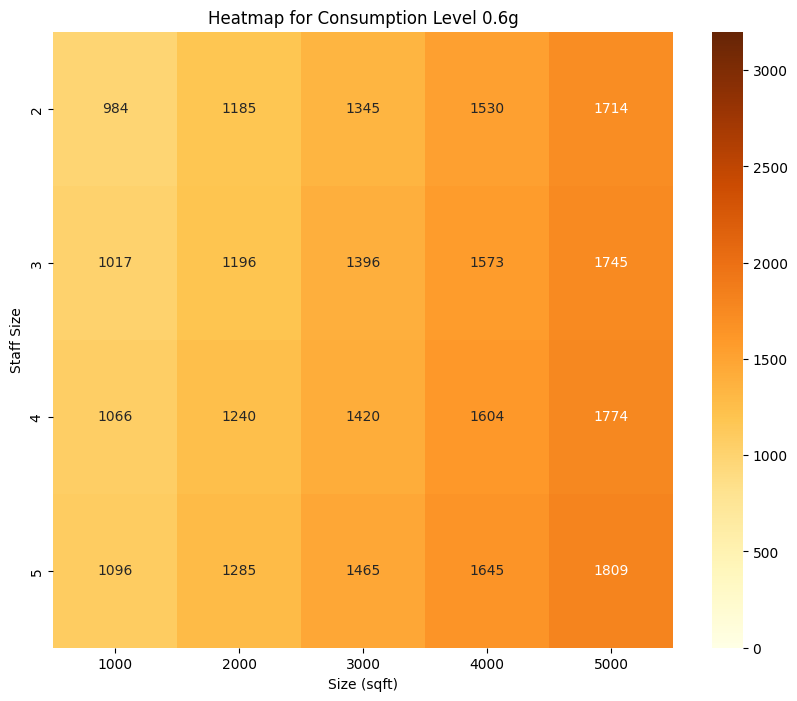

In [188]:
plot_heatmap(average_consumption_0_6, "0.6g", vmin, vmax)

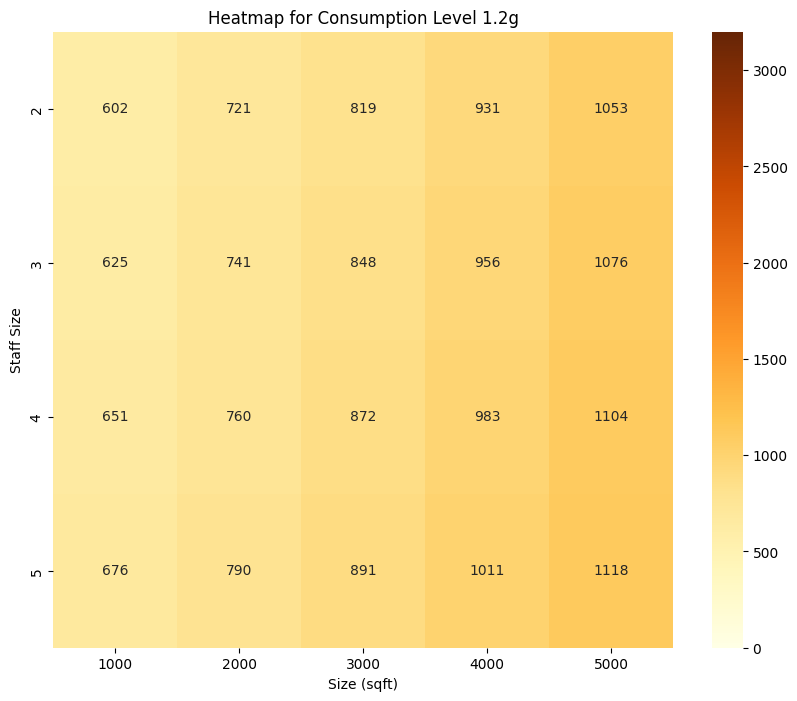

In [189]:
plot_heatmap(average_consumption_1_2, "1.2g", vmin, vmax)

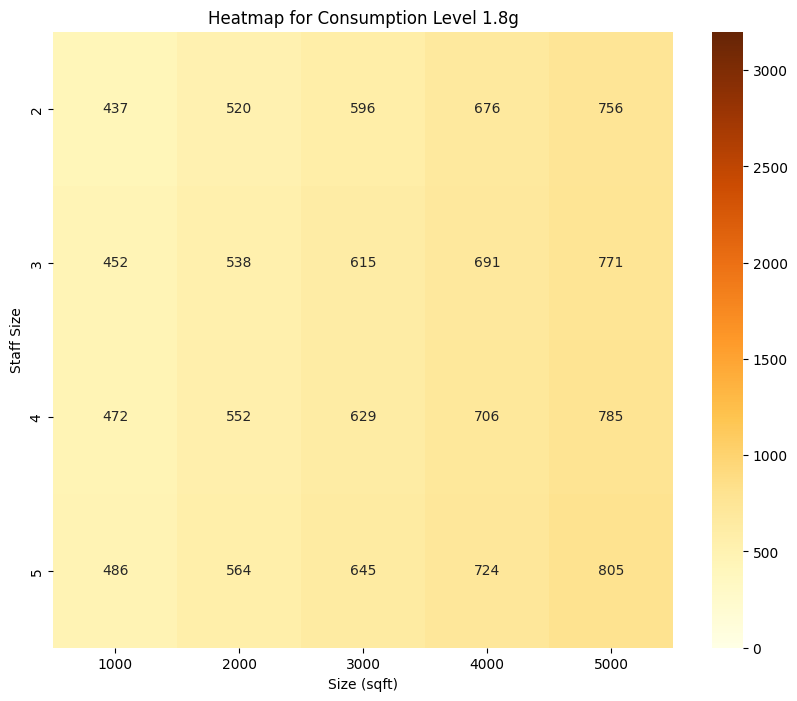

In [190]:
plot_heatmap(average_consumption_1_8, "1.8g", vmin, vmax)

I will now look into what the number of visitors would be needed to put on 4 art workshops a week. So 4 per week. I plan to use a dataset from a non-profit arts centre in Bristol. I plan to use the conservative estimate for this simulation which would use a consumption of 0.6g per visit. I will look into the number of visitors for 3 different scenarios. The cafe subsidising 50% of the cost of a workshop, 75% and 100%.

In [191]:
arts_workshop_costs = pd.read_csv('art_courses.csv')
arts_workshop_costs.head()

,Name,Length,Price,Price per Day (£)
0,Learn To Draw (Beginners),6,158,26.33
1,Learn To Draw (Improvers),6,145,24.17
2,Cartoons and Comics,6,108,18.00
3,Exploring Drawing,6,108,18.00
4,Urban Sketching,6,177,29.50


In [192]:
price_per_day_arts = arts_workshop_costs['Price per Day (£)'].to_numpy()
price_per_day_arts

array([ 26.33,  24.17,  18.  ,  18.  ,  29.5 ,  67.  ,  67.  ,  62.  ,
        67.  ,  19.67,  25.5 ,  77.  ,  48.  ,  82.  ,  67.  ,  82.  ,
        67.  ,  62.  ,  19.67,  62.  ,  62.  ,  18.83,  18.  ,  18.  ,
        28.67,  26.33,  18.83,  62.  ,  28.  ,  62.  ,  62.  ,  62.  ,
        62.  ,  28.  ,  27.  ,  42.  ,  43.  ,  82.  ,  67.  ,  77.  ,
        67.  ,  77.  ,  77.  ,  82.  ,  72.  ,  77.  ,  43.  ,  31.17,
        22.17,  69.5 ,  72.  ,  67.  ,  62.  ,  67.  ,  67.  ,  38.  ,
        67.  ,  72.  ,  43.  ,  24.67,  29.5 ,  62.  ,  77.  ,  48.  ,
        28.  ,  77.  ,  72.  ,  72.  ,  23.  ,  96.  ,  28.33,  28.33,
       111.  ])

In [193]:
# Function to calculate revenue and visitors needed
def calculate_revenue_and_visitors_arts(row, consumption_grams, subsidy):
    size = row['Size_(sqft)']
    staff_size = row['Staff_Size']
    days_open = 25  # Assuming 25 days open in a month
    visitor_array = np.zeros(100)
    revenue_array = np.zeros(100)
    total_fixed_cost = fixed_costs(size, staff_size, days_open)
    food_drink_cost = 5 / 1.35  # Food and drinks profit margin
    cannabis_cost = 4 * canadian_conversion
    
    for i in np.arange(100):
        revenue = 0
        visitors = 0
        cannabis_grams = 0

        total_workshop_cost = np.sum((np.random.choice(price_per_day_arts, size=16) * 20)) * subsidy
            
        while (total_fixed_cost + total_workshop_cost) > revenue:
            simulated_spend = (10 * consumption_grams) + np.random.randint(0, 8)
            visitors += 1
            revenue += simulated_spend
            cannabis_grams += consumption_grams

        total_food_drink_cost = food_drink_cost * visitors
        total_cannabis_cost = cannabis_grams * cannabis_cost
        variable_costs = total_food_drink_cost + total_cannabis_cost
        total_monthly_revenue_needed = total_fixed_cost + variable_costs + total_workshop_cost

        visitor_array[i] = visitors
        revenue_array[i] = total_monthly_revenue_needed

    mean_visitor = np.mean(visitor_array)
    mean_revenue = np.mean(revenue_array)


    return pd.Series([mean_revenue, mean_visitor])

In [194]:
# Copy of the original DataFrame
average_consumption_1_2_arts_halfsubsidy = df.copy()

# Apply the calculate_revenue_and_visitors function for the first consumption level
consumption_level = average_consumption[0]
average_consumption_1_2_arts_halfsubsidy[['Revenue_Needed', 'Visitors_Needed']] = average_consumption_1_2_arts_halfsubsidy.apply(lambda row: calculate_revenue_and_visitors_arts(row, consumption_level, 0.5), axis=1)

In [195]:
average_consumption_1_2_arts_halfsubsidy

,Size_(sqft),Staff_Size,Revenue_Needed,Visitors_Needed
0,1000,2,27355.241444,1876.94
1,1000,3,27725.285641,1900.78
2,1000,4,28497.886142,1953.41
3,1000,5,29023.876211,1989.33
4,2000,2,30209.281722,2072.28
5,2000,3,30288.255906,2077.44
6,2000,4,30942.227384,2122.24
7,2000,5,31601.068604,2168.28
8,3000,2,32427.008923,2224.30
9,3000,3,33155.663724,2274.25


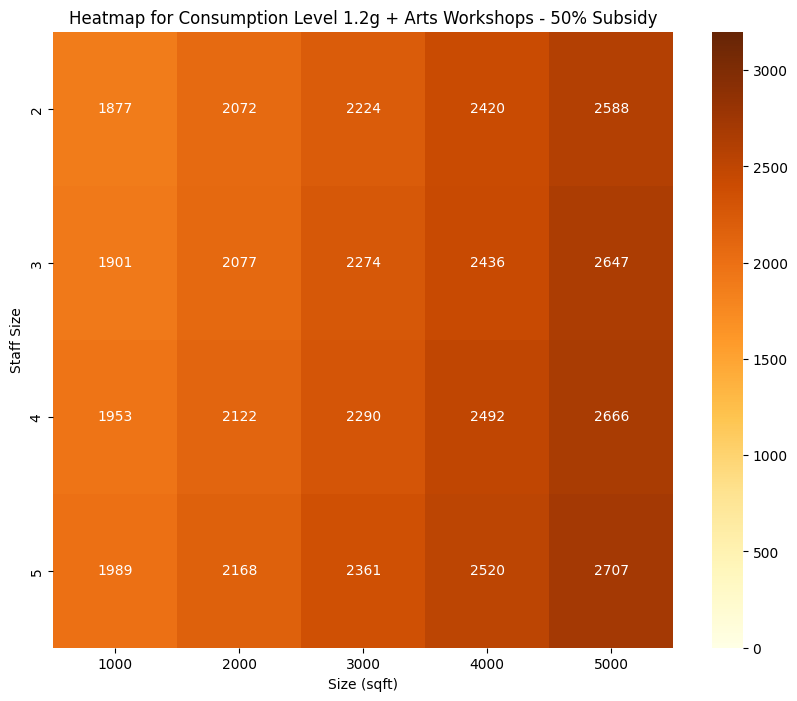

In [196]:
plot_heatmap(average_consumption_1_2_arts_halfsubsidy, "1.2g + Arts Workshops - 50% Subsidy", vmin, vmax)

In [197]:
# Copy of the original DataFrame
average_consumption_1_2_arts_3quartersubsidy = df.copy()

# Apply the calculate_revenue_and_visitors function for the first consumption level
consumption_level = average_consumption[0]
average_consumption_1_2_arts_3quartersubsidy[['Revenue_Needed', 'Visitors_Needed']] = average_consumption_1_2_arts_3quartersubsidy.apply(lambda row: calculate_revenue_and_visitors_arts(row, consumption_level, 0.75), axis=1)

In [198]:
average_consumption_1_2_arts_3quartersubsidy.to_csv('75percentsubsidy_dataframe')

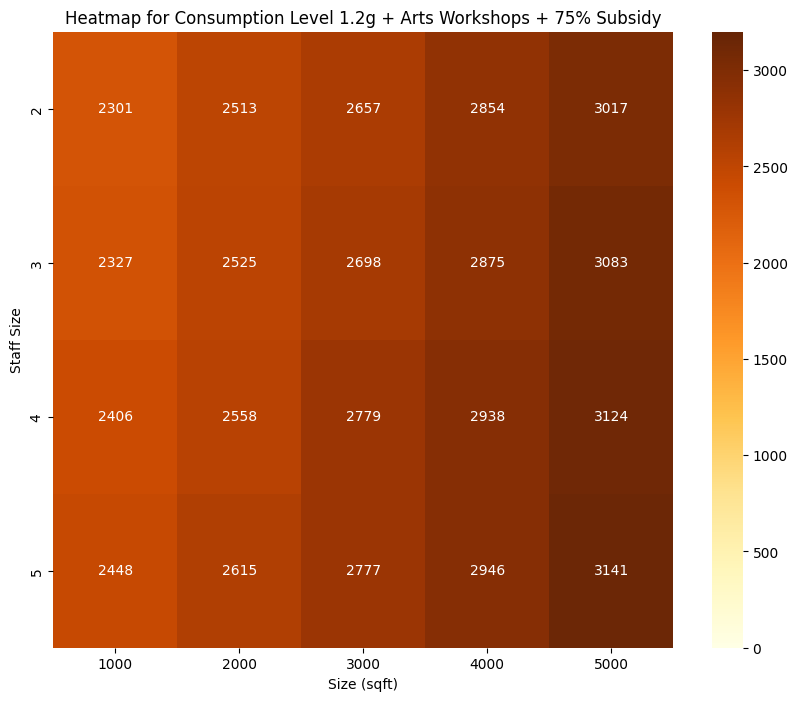

In [199]:
plot_heatmap(average_consumption_1_2_arts_3quartersubsidy, "1.2g + Arts Workshops + 75% Subsidy", vmin, vmax)

In [200]:
# Copy of the original DataFrame
average_consumption_1_2_arts_fullsubsidy = df.copy()

# Apply the calculate_revenue_and_visitors function for the first consumption level
consumption_level = average_consumption[0]
average_consumption_1_2_arts_fullsubsidy[['Revenue_Needed', 'Visitors_Needed']] = average_consumption_1_2_arts_fullsubsidy.apply(lambda row: calculate_revenue_and_visitors_arts(row, consumption_level, 1), axis=1)

In [201]:
average_consumption_1_2_arts_fullsubsidy.to_csv('fullsubsidy_dataframe')

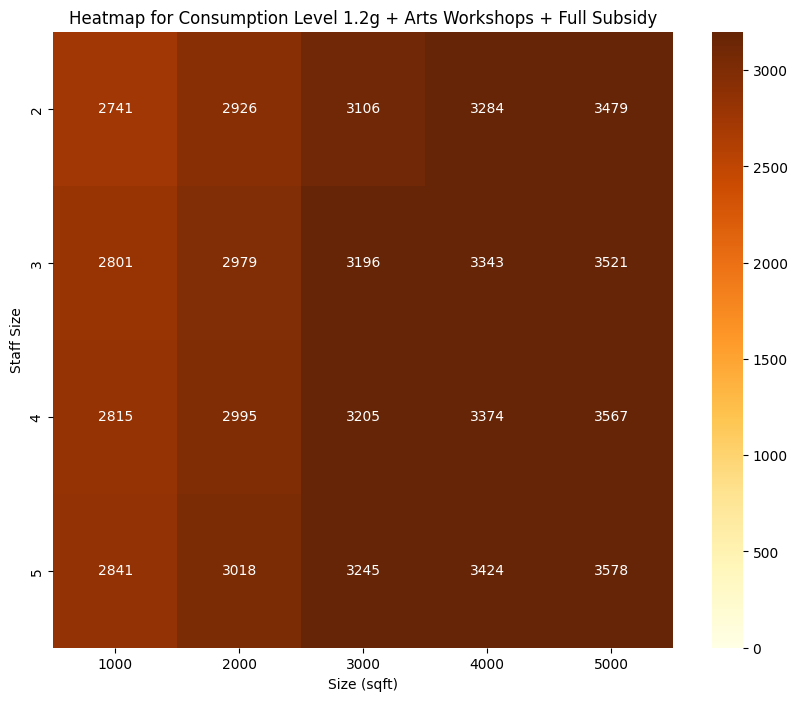

In [202]:
plot_heatmap(average_consumption_1_2_arts_fullsubsidy, "1.2g + Arts Workshops + Full Subsidy", vmin, vmax)